In [1]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce GTX 1650
Using device: cuda


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [6]:
train_dir = "D:\Mini-project\Micro\Iva\Cars Dataset\train"
test_dir =  "D:\Mini-project\Micro\Iva\Cars Dataset\test"

In [8]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Set directories
train_dir = r"D:\Mini-project\Micro\Iva\Cars Dataset\train"
test_dir = r"D:\Mini-project\Micro\Iva\Cars Dataset\test"

# Parameters
batch_size = 32  
img_width, img_height = 128, 128

# Image data generator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Create training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=True
)

# Image data generator for test set
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=False  
)

# Print classes found in the datasets
print("Classes found in training set: ", train_generator.class_indices)
print("Classes found in test set: ", test_generator.class_indices)


Found 3352 images belonging to 7 classes.
Found 813 images belonging to 7 classes.
Classes found in training set:  {'Audi': 0, 'Hyundai Creta': 1, 'Mahindra Scorpio': 2, 'Rolls Royce': 3, 'Swift': 4, 'Tata Safari': 5, 'Toyota Innova': 6}
Classes found in test set:  {'Audi': 0, 'Hyundai Creta': 1, 'Mahindra Scorpio': 2, 'Rolls Royce': 3, 'Swift': 4, 'Tata Safari': 5, 'Toyota Innova': 6}


In [9]:
def AlexNet():
    inp = layers.Input((img_width, img_height, 3))
    x = layers.Conv2D(96, kernel_size=11, strides=4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2)(x)
    x = layers.Conv2D(256, kernel_size=5, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2)(x)
    x = layers.Conv2D(384, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(384, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(7, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

model_Alex = AlexNet()
model_Alex.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 256)      1024  

In [10]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
model_Alex.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [12]:
Alex_model = model_Alex.fit(
    train_generator,
    validation_data=test_generator,
    epochs=75,
    callbacks=[reduce_lr,early_stopping]
)

Epoch 1/75
105/105 [==============================] - 113s 1s/step - loss: 1.8358 - accuracy: 0.2870 - val_loss: 1.9009 - val_accuracy: 0.2337 - lr: 1.0000e-04
Epoch 2/75
105/105 [==============================] - 60s 572ms/step - loss: 1.7148 - accuracy: 0.3511 - val_loss: 1.9101 - val_accuracy: 0.2079 - lr: 1.0000e-04
Epoch 3/75
105/105 [==============================] - 64s 602ms/step - loss: 1.6185 - accuracy: 0.4007 - val_loss: 1.8377 - val_accuracy: 0.2878 - lr: 1.0000e-04
Epoch 4/75
105/105 [==============================] - 59s 558ms/step - loss: 1.5608 - accuracy: 0.4311 - val_loss: 1.5697 - val_accuracy: 0.4342 - lr: 1.0000e-04
Epoch 5/75
105/105 [==============================] - 57s 539ms/step - loss: 1.4517 - accuracy: 0.4746 - val_loss: 1.4998 - val_accuracy: 0.4748 - lr: 1.0000e-04
Epoch 6/75
105/105 [==============================] - 59s 556ms/step - loss: 1.3880 - accuracy: 0.4964 - val_loss: 1.4009 - val_accuracy: 0.4895 - lr: 1.0000e-04
Epoch 7/75
105/105 [==========

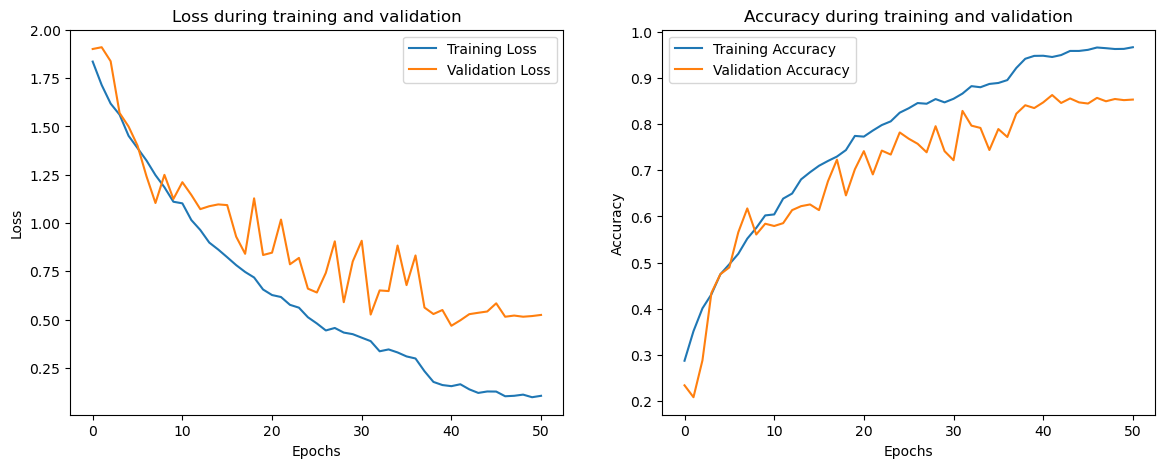

In [13]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss_alex, label='Training Loss')
plt.plot(val_loss_alex, label='Validation Loss')
plt.title('Loss during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_acc_alex, label='Training Accuracy')
plt.plot(val_acc_alex, label='Validation Accuracy')
plt.title('Accuracy during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
model_Alex.save("ivamicro.h5")

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('ivamicro.h5')  # Update the path to your model

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Use the same target size as training
    img_array = image.img_to_array(img)                      # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)           # Expand dimensions to match model input
    img_array /= 255.0                                       # Rescale the image
    return img_array

# Path to the image you want to predict
img_path = r"D:\Downloads\audi1.jpg"  # Update the path and image name

# Load and preprocess the image
processed_image = load_and_preprocess_image(img_path)

# Make a prediction
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions, axis=1)  # Get the class index with the highest probability

# Map predicted class index to class names
class_indices = train_generator.class_indices  # Get class indices from the training generator
class_names = {v: k for k, v in class_indices.items()}  # Reverse the mapping

# Output the predicted class
print("Predicted class index:", predicted_class[0])
print("Predicted class name:", class_names[predicted_class[0]])


1/1 [==============================] - 0s 306ms/step
Predicted class index: 3
Predicted class name: Rolls Royce
